In [1]:
import tensorflow as tf
import os

In [2]:
#Remove all the images which are 9.0kb and under
import cv2
import imghdr
from matplotlib import pyplot as plt

In [3]:
data_dir = './data/ai_vs_real_images'

In [4]:
image_exts = ['jpeg','jpg','bmp','png']

In [5]:
#To check all the folders we have in the data_dir
for image_class in os.listdir(data_dir):
    print(image_class)

AI
real


In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)): #Now image contains all the images of all the image_classes-happy and sad
        image_path = os.path.join(data_dir, image_class, image)
        try:
          img=cv2.imread(image_path) #Reads the image by opencv
          tip=imghdr.what(image_path)
          if tip not in image_exts: #if not a valid image extesnion that we have provided
            print('Image not in ext list {}'.format(image_path))
            os.remove(image_path)
        except Exception as e:                                    #If not a good image (cant read by opencv or anything)
          print("Issue with image {}".format(image_path))
          #os.remove(image_path)


In [8]:
import os

data_dir = "./data/ai_vs_real_images"

for image_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, image_class)
    if os.path.isdir(class_dir):
        counter = 1
        existing_names = set(os.listdir(class_dir))  # store current filenames for collision check
        
        for image in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image)
            if not os.path.isfile(image_path):
                continue
            
            file_extension = os.path.splitext(image)[1]
            
            # If file is already correctly named like "AI-1.jpg", skip it
            expected_prefix = f"{image_class}-"
            if image.startswith(expected_prefix):
                continue
            
            # Find a new available name (avoid overwriting)
            while True:
                new_file_name = f"{image_class}-{counter}{file_extension}"
                if new_file_name not in existing_names:
                    break
                counter += 1  # increment until unused name found
            
            new_file_path = os.path.join(class_dir, new_file_name)
            
            os.rename(image_path, new_file_path)
            existing_names.add(new_file_name)  # update existing names
            counter += 1  # increment for next file


In [6]:
import numpy as np

In [7]:
data = tf.keras.utils.image_dataset_from_directory('./data/ai_vs_real_images')

Found 191533 files belonging to 2 classes.


In [8]:
data_iterator = data.as_numpy_iterator()

In [9]:
batch = data_iterator.next()

In [10]:
len(batch)

2

In [11]:
batch[0]

array([[[[207., 201., 189.],
         [208., 202., 190.],
         [210., 204., 192.],
         ...,
         [211., 193., 157.],
         [210., 190., 153.],
         [203., 183., 146.]],

        [[206., 200., 188.],
         [209., 203., 191.],
         [212., 206., 194.],
         ...,
         [212., 194., 158.],
         [210., 190., 153.],
         [206., 186., 149.]],

        [[206., 200., 188.],
         [210., 204., 192.],
         [214., 208., 196.],
         ...,
         [212., 194., 158.],
         [210., 190., 153.],
         [211., 191., 154.]],

        ...,

        [[195., 215., 214.],
         [186., 206., 205.],
         [194., 212., 212.],
         ...,
         [ 64.,  94., 130.],
         [ 57.,  80., 111.],
         [ 59.,  79., 104.]],

        [[178., 200., 197.],
         [170., 192., 189.],
         [180., 200., 198.],
         ...,
         [ 75., 105., 141.],
         [ 64.,  87., 118.],
         [ 61.,  82., 109.]],

        [[157., 179., 176.],
       

In [12]:
batch[1]

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0], dtype=int32)

In [13]:
batch[0].shape

(32, 256, 256, 3)

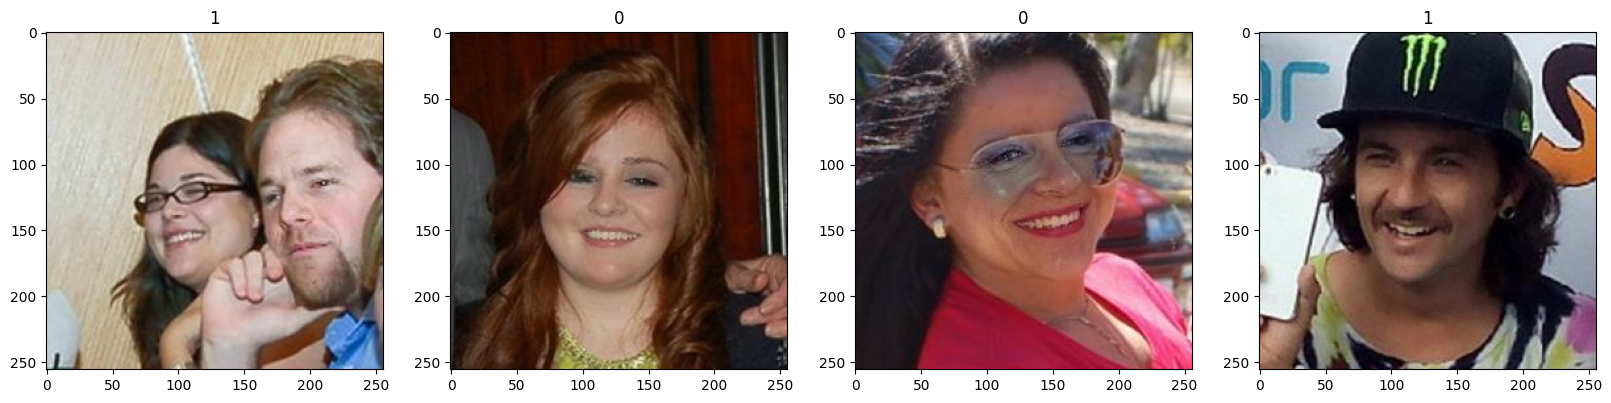

In [14]:
fig, ax=plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]) :
  ax[idx].imshow(img.astype(int))      #PPictures getting printed
  ax[idx].title.set_text(batch[1][idx])

In [15]:
print(batch[0].max())
print(batch[1].min())

255.0
0


In [16]:
data = data.map(lambda x,y: (x/255,y))

In [17]:
scaled_iterator = data.as_numpy_iterator()

In [18]:
batch = scaled_iterator.next()

In [19]:
print(batch[0].min())
print(batch[0].max())

0.0
1.0


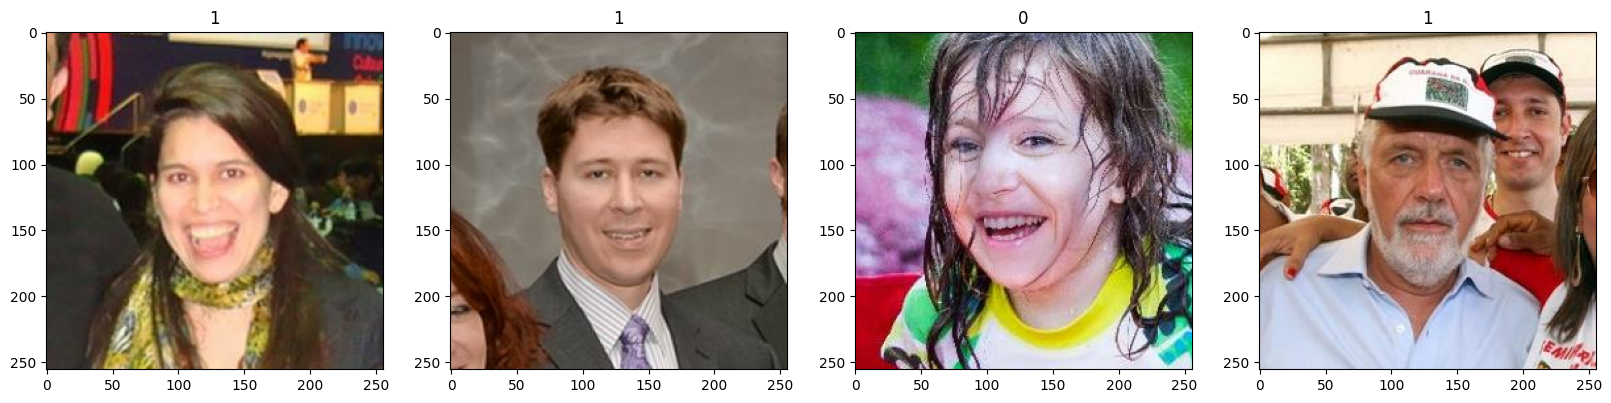

In [20]:
fig, ax=plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]) :
  ax[idx].imshow(img)    
  ax[idx].title.set_text(batch[1][idx])

In [21]:
len(data)

5986

In [22]:
train_size = int(len(data)*.7) #70% of batches
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [23]:
print(train_size)
print(val_size)
print(test_size)
print(train_size+val_size+test_size)

4190
1197
599
5986


In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

<h1>CNN</h1>

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [26]:
model = Sequential()

In [27]:
# 1st Convolutional Block
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

# 2nd Convolutional Block
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

# 3rd Convolutional Block
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

c:\Users\Adityavk\.conda\envs\ai-detector\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
import tensorflow as tf

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,881 (14.10 MB)

 Trainable params: 3,696,753 (14.10 MB)

 Non-trainable params: 128 (512.00 B)

In [30]:
import datetime
from tensorflow.keras.callbacks import TensorBoard

logdir = 'C:/Achu/Projects/Maching Learning/AI Detector/logs/image_classifier_logs/CNN_logs/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback = TensorBoard(log_dir=logdir, histogram_freq=1)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

lr_reduction = ReduceLROnPlateau(
    monitor='val_loss',
    patience=2,
    factor=0.5,
    verbose=1
)

# ✅ Train model with all callbacks
hist = model.fit(
    train,
    epochs=30,
    validation_data=val,
    callbacks=[early_stop, lr_reduction, tensorflow_callback]
)

# ✅ Save model after training
model.save('cnn_large.keras')
print("Model saved as cnn.keras ✅")


Epoch 1/30
4190/4190 ━━━━━━━━━━━━━━━━━━━━ 2761s 659ms/step - accuracy: 0.8047 - loss: 0.4414 - val_accuracy: 0.8729 - val_loss: 0.2902 - learning_rate: 0.0010
Epoch 2/30
4190/4190 ━━━━━━━━━━━━━━━━━━━━ 2863s 683ms/step - accuracy: 0.8891 - loss: 0.2634 - val_accuracy: 0.9184 - val_loss: 0.1953 - learning_rate: 0.0010
Epoch 3/30
4190/4190 ━━━━━━━━━━━━━━━━━━━━ 2852s 681ms/step - accuracy: 0.9066 - loss: 0.2257 - val_accuracy: 0.9100 - val_loss: 0.2124 - learning_rate: 0.0010
Epoch 4/30
4190/4190 ━━━━━━━━━━━━━━━━━━━━ 2870s 685ms/step - accuracy: 0.9184 - loss: 0.1965 - val_accuracy: 0.9224 - val_loss: 0.1918 - learning_rate: 0.0010
Epoch 5/30
4190/4190 ━━━━━━━━━━━━━━━━━━━━ 2894s 691ms/step - accuracy: 0.9265 - loss: 0.1788 - val_accuracy: 0.9069 - val_loss: 0.2566 - learning_rate: 0.0010
Epoch 6/30
4190/4190 ━━━━━━━━━━━━━━━━━━━━ 2901s 692ms/step - accuracy: 0.9323 - loss: 0.1654 - val_accuracy: 0.9257 - val_loss: 0.1762 - learning_rate: 0.0010
Epoch 7/30
4190/4190 ━━━━━━━━━━━━━━━━━━━━ 2906

In [32]:
hist.history

{'accuracy': [0.8046987056732178,
  0.8891184329986572,
  0.9066154360771179,
  0.9184442162513733,
  0.9264618158340454,
  0.9323165416717529,
  0.9370375871658325,
  0.9414827227592468,
  0.9449880719184875,
  0.947799801826477,
  0.9561008214950562,
  0.9589722752571106,
  0.9604266285896301,
  0.9654608964920044,
  0.9665423631668091,
  0.9669973254203796,
  0.9682130217552185,
  0.9705399870872498,
  0.9715468287467957,
  0.9722031354904175,
  0.972665548324585],
 'loss': [0.4414274990558624,
  0.26339757442474365,
  0.2256653904914856,
  0.19649484753608704,
  0.17884649336338043,
  0.16536755859851837,
  0.15511058270931244,
  0.14428851008415222,
  0.13618949055671692,
  0.12977218627929688,
  0.10859984904527664,
  0.10316464304924011,
  0.0975678488612175,
  0.08660278469324112,
  0.0836050882935524,
  0.08370327204465866,
  0.07942914217710495,
  0.07259318977594376,
  0.07219679653644562,
  0.07067342102527618,
  0.06750351935625076],
 'val_accuracy': [0.8728592395782471,
 

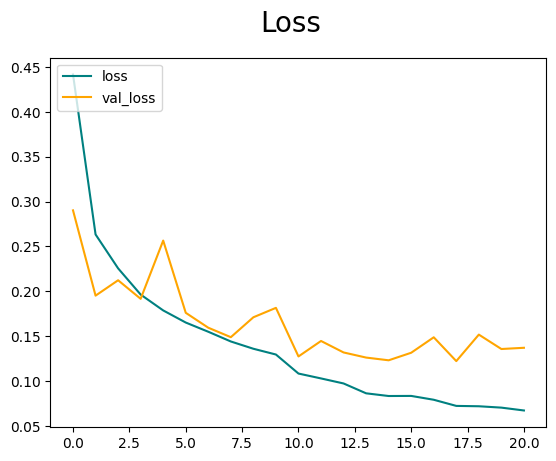

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal', label='loss')
plt.plot(hist.history['val_loss'], color = 'orange', label='val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

In [34]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [35]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [36]:
len(test)

599

In [37]:
for batch in test.as_numpy_iterator() :
  X, y = batch #X-Set of images, y-true value
  yhat = model.predict(X)  #yhat value will be the predicted value we got from sigmoid 0 to 1.(Near 0 rounded to 0 and vice versa)
  pre.update_state(y,yhat) #Passing actual y-value(0 or 1) and the predicted value(yhat)
  re.update_state(y,yhat) # same
  acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/

In [38]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.9463066458702087, Recall:0.9684489369392395, Accuracy:0.957334578037262


In [39]:
import cv2

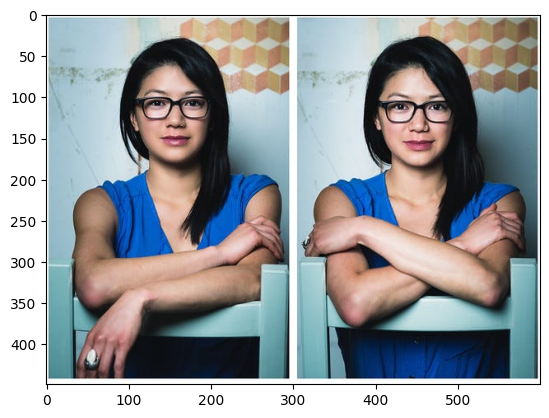

In [40]:
img = cv2.imread('./data/ai_vs_real_images/real/real-7.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

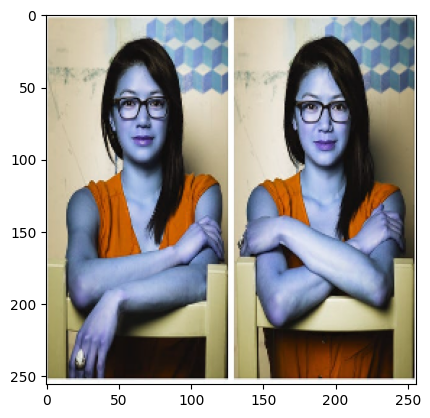

In [41]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [42]:
#Our model expects us to give a batch of images to predict not a single image.SO we have to encapsule the image in an array or list or..
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [43]:
yhat = model.predict(np.expand_dims(resize/255,0))  #We have to scale also to give to model(only resized till now)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [44]:
yhat

array([[0.8781206]], dtype=float32)

In [45]:
if yhat>0.5 :
  print('Predicted class is Real')
else :
  print('Predicted class is AI')

Predicted class is Real


<h1>MobileNETV2</h1>

In [52]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

In [53]:
input_shape = (256, 256, 3)

# Load the pre-trained MobileNetV2 model as the base
base_model = MobileNetV2(input_shape=input_shape,
                         include_top=False,
                         weights='imagenet')

# Freeze the convolutional base
base_model.trainable = False

x = base_model.output

x = GlobalAveragePooling2D()(x)

x = Dense(256, activation='relu')(x)

x = Dropout(0.5)(x)

predictions = Dense(1, activation='sigmoid')(x)

transfer_model = Model(inputs=base_model.input, outputs=predictions)

C:\Users\Adityavk\AppData\Local\Temp\ipykernel_18416\1095139447.py:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=input_shape,


In [54]:
transfer_model.compile('adam',
                       loss=tf.losses.BinaryCrossentropy(),
                       metrics=['accuracy'])

In [55]:
transfer_model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 128, 128,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 128, 128,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 128, 128,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 128, 128,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 128, 128,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 128, 128,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 128, 128,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 128, 128,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 128, 128,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 128, 128,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 128, 128,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 129, 129,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 64, 64,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 64, 64,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 64, 64,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 64, 64,    │      2,304 │ block_1_depthwis

 Total params: 2,586,177 (9.87 MB)

 Trainable params: 328,193 (1.25 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [56]:
logdir = 'C:\Achu\Projects\Maching Learning\AI Detector\logs\image_classifier_logs\MobileNetV2_logs'
tensorflow_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# Using the same train and val datasets as before
hist_transfer = transfer_model.fit(train, epochs=20, validation_data=val, callbacks=[tensorflow_callback])

Epoch 1/20
 640/4190 ━━━━━━━━━━━━━━━━━━━━ 28:31 482ms/step - accuracy: 0.7168 - loss: 0.5528

KeyboardInterrupt: 

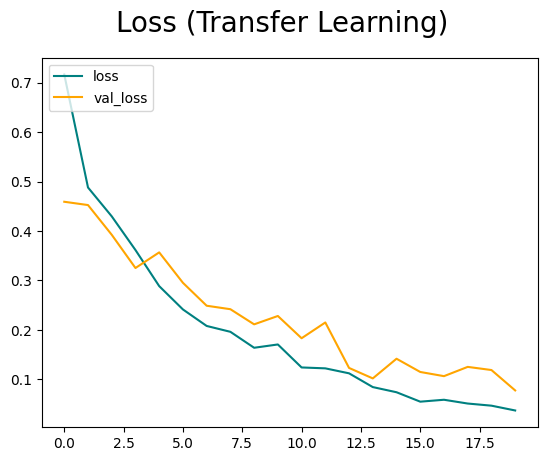

In [83]:
fig = plt.figure()
plt.plot(hist_transfer.history['loss'], color='teal', label='loss')
plt.plot(hist_transfer.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss (Transfer Learning)', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [84]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

# Loop through the same test data
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = transfer_model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 873ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
Precision:0.9555555582046509, Recall:0.9772727489471436, Accuracy:0.96875


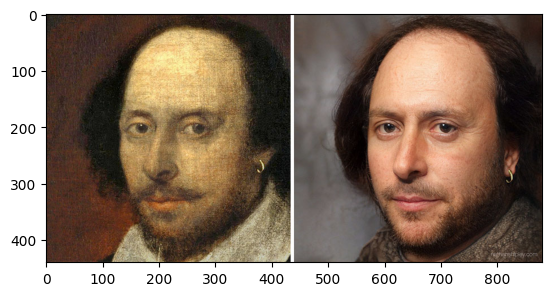

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step
Predicted class is AI with confidence 0.9136456847190857


In [85]:
img = cv2.imread('./data/ai_vs_real_images/AI/AI-1.jpg') # Example with an AI image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Preprocess the image
resize = tf.image.resize(img, (256,256))
yhat_transfer = transfer_model.predict(np.expand_dims(resize/255, 0))

# Make prediction
if yhat_transfer > 0.5:
    print(f'Predicted class is Real with confidence {yhat_transfer[0][0]}')
else:
    print(f'Predicted class is AI with confidence {1 - yhat_transfer[0][0]}')

In [ ]:
transfer_model.save('.models/image_classifier/MobileNetV2_ai_classifier.keras')

<h1>CNN + MobileNetV2 </h1>

In [95]:
model_dir = 'C:/Achu/Projects/Maching Learning/AI Detector/models/image_classifier'

# Define the paths to your two best-performing saved models
cnn_model_path = os.path.join(model_dir, 'CNN_ai_image_classifier.keras')
mobilenet_model_path = os.path.join(model_dir, 'MobileNetV2_ai_classifier.keras')

# Load the models
print("Loading CNN and MobileNetV2 models...")
model_cnn = tf.keras.models.load_model(cnn_model_path)
model_mobilenet = tf.keras.models.load_model(mobilenet_model_path)
print("Models loaded successfully.")

Loading CNN and MobileNetV2 models...


c:\Users\Adityavk\.conda\envs\ai-detector\lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Models loaded successfully.


In [96]:
# We give more weight to the model with higher accuracy.
weight_cnn = 0.40
weight_mobilenet = 0.60

def get_hybrid_predictions(image_batch):
    # Get predictions from the custom CNN model
    preds_cnn = model_cnn.predict(image_batch)

    # Get predictions from the MobileNetV2 model
    preds_mobilenet = model_mobilenet.predict(image_batch)

    # Calculate the weighted average of the predictions
    weighted_preds = (preds_cnn * weight_cnn) + (preds_mobilenet * weight_mobilenet)

    return weighted_preds

In [97]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

# Re-initialize the metrics for a clean evaluation
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

# Loop through the test data
for batch in test.as_numpy_iterator():
    X, y = batch # X is the set of images, y is the true label

    # Get the hybrid prediction using our new ensemble function
    yhat_hybrid = get_hybrid_predictions(X)

    # Update the metrics with the hybrid's predictions
    pre.update_state(y, yhat_hybrid)
    re.update_state(y, yhat_hybrid)
    acc.update_state(y, yhat_hybrid)

print(f'--- Hybrid Model (CNN + MobileNetV2) Performance ---')
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 874ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
--- Hybrid Model (CNN + MobileNetV2) Performance ---
Precision: 0.949999988079071, Recall: 0.9743589758872986, Accuracy: 0.96875


<h1>VIT Transformer </h1>

In [31]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms as T 
import timm
import numpy as np
from tqdm import tqdm

c:\Users\Adityavk\.conda\envs\ai-detector\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
# Check if a GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Create the ViT model, pretrained on ImageNet
vit_model = timm.create_model('vit_base_patch16_224', pretrained=True)

# The default classifier head in this ViT model is named 'head'
# It has 1000 output features for ImageNet classes.
# We need to replace it with a new head for our 1-output binary problem.
n_inputs = vit_model.head.in_features
vit_model.head = nn.Sequential(
    nn.Linear(n_inputs, 512),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(512, 1) # Output is 1 neuron for binary classification
)

# Move the model to the selected device (GPU or CPU)
vit_model = vit_model.to(device)

# You can print the model to see the new head
# print(vit_model)

Using device: cpu


In [34]:
def convert_tf_to_pytorch(tf_dataset, image_size=224):
    """
    Converts a tf.data.Dataset to a PyTorch TensorDataset.
    Resizes images to 224x224 as required by this ViT model.
    """
    all_images = []
    all_labels = []

    # The ViT model expects images to be normalized in a specific way
    # We define this transformation here.
    pytorch_transforms = T.Compose([
        T.Resize((image_size, image_size)),
        T.ConvertImageDtype(torch.float),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    print("Converting TensorFlow dataset to PyTorch format...")
    for images, labels in tqdm(tf_dataset.as_numpy_iterator()):
        # tf data is (batch, 256, 256, 3) and values are 0-1
        # PyTorch expects (batch, 3, height, width)
        images_tensor = torch.from_numpy(images).permute(0, 3, 1, 2)

        # Apply transformations for each image in the batch
        transformed_images = [pytorch_transforms(img) for img in images_tensor]
        all_images.append(torch.stack(transformed_images))
        all_labels.append(torch.from_numpy(labels))

    # Concatenate all batches
    final_images = torch.cat(all_images)
    final_labels = torch.cat(all_labels).float().unsqueeze(1) # Reshape labels for loss function

    return TensorDataset(final_images, final_labels)

# Convert each of your datasets
train_dataset_pytorch = convert_tf_to_pytorch(train)
val_dataset_pytorch = convert_tf_to_pytorch(val)
test_dataset_pytorch = convert_tf_to_pytorch(test)

# Create the PyTorch DataLoaders
batch_size = 32 # You can adjust this
train_loader = DataLoader(train_dataset_pytorch, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset_pytorch, batch_size=batch_size)
test_loader = DataLoader(test_dataset_pytorch, batch_size=batch_size)

Converting TensorFlow dataset to PyTorch format...


0it [00:00, ?it/s]

C:\Users\Adityavk\AppData\Local\Temp\ipykernel_15908\2925824308.py:21: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_numpy.cpp:209.)
  images_tensor = torch.from_numpy(images).permute(0, 3, 1, 2)
20it [00:02,  8.67it/s]


Converting TensorFlow dataset to PyTorch format...


5it [00:01,  2.95it/s]


Converting TensorFlow dataset to PyTorch format...


3it [00:01,  1.70it/s]


In [35]:
# Define Loss Function and Optimizer
criterion = nn.BCEWithLogitsLoss() # This is better than Sigmoid + BCELoss
optimizer = torch.optim.Adam(vit_model.parameters(), lr=1e-4)
num_epochs = 10 # You can train for more epochs for better results

print("\nStarting ViT model training...")
for epoch in range(num_epochs):
    vit_model.train() # Set model to training mode
    running_loss = 0.0

    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        # Move data to the device
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = vit_model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch {epoch+1} Loss: {epoch_loss:.4f}")

    # --- Validation Phase ---
    vit_model.eval() # Set model to evaluation mode
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = vit_model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
    
    epoch_val_loss = val_loss / len(val_loader.dataset)
    print(f"Epoch {epoch+1} Validation Loss: {epoch_val_loss:.4f}")

print("Finished Training.")


Starting ViT model training...


Epoch 1/10: 100%|██████████| 20/20 [09:06<00:00, 27.33s/it]


Epoch 1 Loss: 0.5826
Epoch 1 Validation Loss: 0.3677


Epoch 2/10: 100%|██████████| 20/20 [09:19<00:00, 27.95s/it]


Epoch 2 Loss: 0.2793
Epoch 2 Validation Loss: 0.3483


Epoch 3/10: 100%|██████████| 20/20 [09:22<00:00, 28.13s/it]


Epoch 3 Loss: 0.1569
Epoch 3 Validation Loss: 0.3535


Epoch 4/10: 100%|██████████| 20/20 [13:06<00:00, 39.34s/it]  


Epoch 4 Loss: 0.0784
Epoch 4 Validation Loss: 0.4008


Epoch 5/10: 100%|██████████| 20/20 [09:20<00:00, 28.02s/it]


Epoch 5 Loss: 0.0395
Epoch 5 Validation Loss: 0.5424


Epoch 6/10: 100%|██████████| 20/20 [09:23<00:00, 28.17s/it]


Epoch 6 Loss: 0.1336
Epoch 6 Validation Loss: 0.2948


Epoch 7/10: 100%|██████████| 20/20 [1:09:59<00:00, 209.97s/it]   


Epoch 7 Loss: 0.0494
Epoch 7 Validation Loss: 0.3651


Epoch 8/10: 100%|██████████| 20/20 [13:45:24<00:00, 2476.21s/it]    


Epoch 8 Loss: 0.0417
Epoch 8 Validation Loss: 0.3166


Epoch 9/10: 100%|██████████| 20/20 [03:47<00:00, 11.39s/it]


Epoch 9 Loss: 0.0671
Epoch 9 Validation Loss: 0.2836


Epoch 10/10: 100%|██████████| 20/20 [03:50<00:00, 11.51s/it]


Epoch 10 Loss: 0.0091
Epoch 10 Validation Loss: 0.3740
Finished Training.


In [36]:
vit_model.eval() # Ensure model is in evaluation mode
correct = 0
total = 0

with torch.no_grad(): # We don't need to calculate gradients here
    for images, labels in tqdm(test_loader, desc="Evaluating on Test Set"):
        images, labels = images.to(device), labels.to(device)
        
        # Get model outputs
        outputs = vit_model(images)
        
        
        predicted = torch.sigmoid(outputs) > 0.5
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'\nAccuracy of the Vision Transformer model on the test images: {accuracy:.2f} %')

Evaluating on Test Set: 100%|██████████| 3/3 [00:11<00:00,  3.76s/it]


Accuracy of the Vision Transformer model on the test images: 92.71 %


In [37]:
import os

save_dir = 'C:/Achu/Projects/Maching Learning/AI Detector/models/image_classifier'

os.makedirs(save_dir, exist_ok=True)

model_path = os.path.join(save_dir, 'VIT_ai_classifier.pth')

torch.save(vit_model.state_dict(), model_path)

print(f"ViT Model saved successfully to {model_path}")

ViT Model saved successfully to C:/Achu/Projects/Maching Learning/AI Detector/models/image_classifier\VIT_ai_classifier.pth


<h1>CNN+MobileNetV2+VIT</h1>

In [41]:
import tensorflow as tf
import torch
import timm
import torch.nn as nn
from torchvision import transforms as T
import os
import numpy as np

# --- Load Keras Models ---
model_dir = 'C:/Achu/Projects/Maching Learning/AI Detector/models/image_classifier'
cnn_model_path = os.path.join(model_dir, 'CNN_ai_image_classifier.keras')
mobilenet_model_path = os.path.join(model_dir, 'MobileNetV2_ai_classifier.keras')

print("Loading Keras models...")
model_cnn = tf.keras.models.load_model(cnn_model_path)
model_mobilenet = tf.keras.models.load_model(mobilenet_model_path)
print("Keras models loaded.")

# --- Load PyTorch ViT Model ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 1. Re-create the ViT architecture with the CORRECT model name
vit_model = timm.create_model('vit_base_patch16_224', pretrained=False) 
n_inputs = vit_model.head.in_features

# Recreate the exact same head as you did during training
vit_model.head = nn.Sequential(
    nn.Linear(n_inputs, 512),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(512, 1)
)

# 2. Load the saved weights
vit_model_path = os.path.join(model_dir, 'VIT_ai_classifier.pth')
vit_model.load_state_dict(torch.load(vit_model_path, map_location=device)) # Added map_location for flexibility

# 3. Move to device and set to evaluation mode
vit_model = vit_model.to(device)
vit_model.eval()
print("PyTorch ViT model loaded successfully.")

Loading Keras models...
Keras models loaded.
Using device: cpu
PyTorch ViT model loaded successfully.


In [42]:
# Define weights based on model performance. Give the most weight to the best model.
w_cnn = 0.20
w_vit = 0.20
w_mobilenet = 0.60 # The star performer gets the most influence

# Define the image transforms required for the ViT model
vit_transforms = T.Compose([
    T.Resize((224, 224)),
    T.ConvertImageDtype(torch.float),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

def get_final_hybrid_predictions(image_batch_tf):
    """
    Takes a TensorFlow image batch (0-1 floats, 256x256) and gets a weighted
    prediction from all three models.
    """
    # 1. Get Keras model predictions (they work directly with the TF batch)
    preds_cnn = model_cnn.predict(image_batch_tf, verbose=0)
    preds_mobilenet = model_mobilenet.predict(image_batch_tf, verbose=0)

    # 2. Prepare batch for PyTorch model
    # Convert from (batch, H, W, C) to (batch, C, H, W) and then to PyTorch tensor
    images_torch = torch.from_numpy(image_batch_tf).permute(0, 3, 1, 2)
    # Apply the ViT-specific transforms
    images_torch_transformed = torch.stack([vit_transforms(img) for img in images_torch]).to(device)

    # 3. Get PyTorch model prediction
    with torch.no_grad():
        outputs_vit_logits = vit_model(images_torch_transformed)
        # Apply sigmoid to convert logits to probabilities
        preds_vit_torch = torch.sigmoid(outputs_vit_logits)
        # Move predictions to CPU and convert to numpy array
        preds_vit = preds_vit_torch.cpu().numpy()

    # 4. Calculate the final weighted average
    final_preds = (preds_cnn * w_cnn) + (preds_vit * w_vit) + (preds_mobilenet * w_mobilenet)
    
    return final_preds

In [43]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat_final = get_final_hybrid_predictions(X)

    pre.update_state(y, yhat_final)
    re.update_state(y, yhat_final)
    acc.update_state(y, yhat_final)

print(f'--- Final 3-Model Hybrid Performance ---')
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

--- Final 3-Model Hybrid Performance ---
Precision: 1.0, Recall: 1.0, Accuracy: 1.0


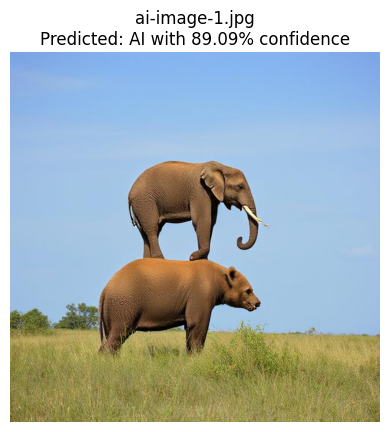

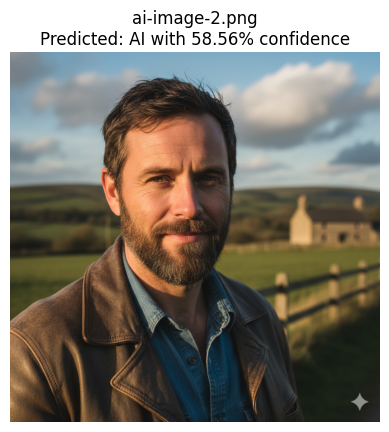

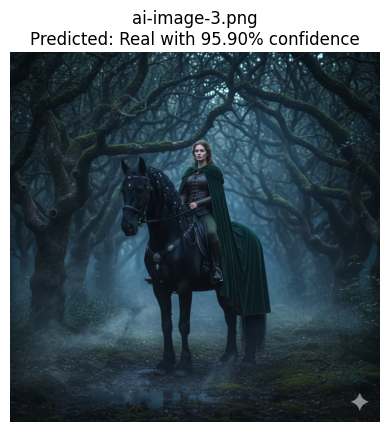

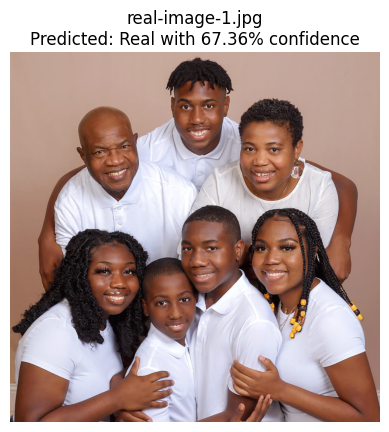

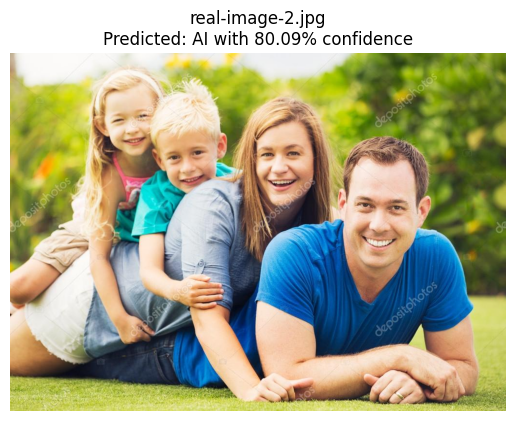

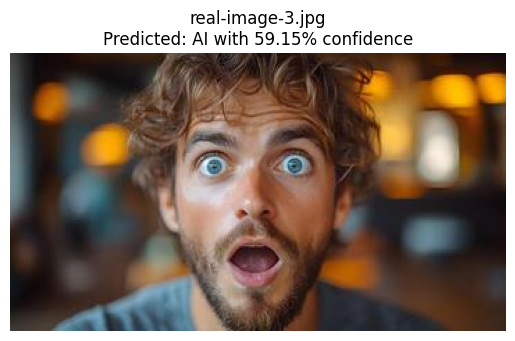

In [47]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_folder = 'C:/Achu/Projects/Maching Learning/AI Detector/final_test_images/'
image_paths = [
    'ai-image-1.jpg', 
    'ai-image-2.png',
    'ai-image-3.png',
    'real-image-1.jpg',
    'real-image-2.jpg',
    'real-image-3.jpg'
]

for img_name in image_paths:
    full_path = os.path.join(image_folder, img_name)

    img = cv2.imread(full_path)
    if img is None:
        print(f"Could not read image: {full_path}")
        continue
        
    resize = tf.image.resize(img, (256, 256))
    image_batch_tf = np.expand_dims(resize / 255.0, 0)
    
    final_prediction = get_final_hybrid_predictions(image_batch_tf)
    score = final_prediction[0][0]

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    prediction_text = f"Predicted: AI with {score:.2%} confidence" if score > 0.5 else f"Predicted: Real with {1-score:.2%} confidence"
    plt.title(f"{img_name}\n{prediction_text}")
    plt.show()